In [2]:
!pip install apimoex

In [3]:
import sys
import apimoex
import pandas as pd
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, kstest
from statsmodels.tsa.stattools import adfuller

In [4]:
# Последняя рабочая неделя, для сбора статистики
monday = datetime.datetime(year=2024, month=12, day=16)
tuesday = datetime.datetime(year=2024, month=12, day=17)
wednesday = datetime.datetime(year=2024, month=12, day=18)
thursday = datetime.datetime(year=2024, month=12, day=19)
friday = datetime.datetime(year=2024, month=12, day=20)
week = [monday, tuesday, wednesday, thursday, friday]

In [5]:
# Рассматриваемые тикеры для статистик
tickers = ["SBER", "VTBR", "ROSN", "GOLD", "LKOH"]
extra_tickers = ["MOEXFN", "MOEXCN", "TRUR", ]

In [18]:
seven = datetime.timedelta(days=7)
data = {}
friday = datetime.datetime.now()

with requests.Session() as session:
    for i in tickers:
        for weeks in range(36):
            dt = friday - weeks * seven
            candles = apimoex.get_market_candles(session, i, 10, str(dt - datetime.timedelta(days=5))[:-9], str(dt)[:-9])
            dc = pd.DataFrame(candles)
            if i not in data:
                data[i] = [dc]
            else:
                data[i].append(dc)


In [19]:
# Объединение всех DataFrame для каждого тикера в один
for key in data:
    data[key] = pd.concat(data[key], ignore_index=True)
print(data)

{'SBER':                     begin    open   close    high     low        value  \
0     2024-12-18 09:50:00  226.72  226.72  226.72  226.72   12347171.2   
1     2024-12-18 10:00:00  226.72  227.40  227.99  226.52  748672426.6   
2     2024-12-18 10:10:00  227.41  227.10  227.72  227.10  214191483.8   
3     2024-12-18 10:20:00  227.10  226.79  227.16  226.76  267217886.2   
4     2024-12-18 10:30:00  226.78  226.70  226.82  226.50  162985319.6   
...                   ...     ...     ...     ...     ...          ...   
8856  2024-04-19 23:00:00  307.76  307.70  307.76  307.68   23312024.1   
8857  2024-04-19 23:10:00  307.70  307.67  307.70  307.65   40274742.4   
8858  2024-04-19 23:20:00  307.66  307.66  307.67  307.62   17121019.9   
8859  2024-04-19 23:30:00  307.66  307.65  307.67  307.57   40815169.0   
8860  2024-04-19 23:40:00  307.65  307.38  307.66  307.37   53810211.0   

       volume  
0       54460  
1     3291370  
2      941860  
3     1177160  
4      719070  
...   

In [20]:
instrument = "GOLD"
df = data[instrument]

In [21]:
# Проверка пропущенных значений
print(df.isnull().sum())

begin     0
open      0
close     0
high      0
low       0
value     0
volume    0
dtype: int64


In [22]:
# Описание основных статистик
print(df.describe())


              open        close         high          low         value  \
count  8861.000000  8861.000000  8861.000000  8861.000000  8.861000e+03   
mean      1.892555     1.892513     1.894119     1.890316  8.714003e+05   
std       0.199842     0.199812     0.200187     0.199454  2.610487e+06   
min       1.566500     1.564000     1.578500     1.562500  1.892200e+02   
25%       1.717500     1.717000     1.718500     1.715500  1.250680e+05   
50%       1.814000     1.814500     1.815500     1.812000  3.362353e+05   
75%       2.095000     2.095500     2.097000     2.093500  8.275724e+05   
max       2.339500     2.340000     2.348500     2.331500  1.159136e+08   

             volume  
count  8.861000e+03  
mean   4.465129e+05  
std    1.353811e+06  
min    1.080000e+02  
25%    6.773800e+04  
50%    1.794260e+05  
75%    4.301190e+05  
max    6.396998e+07  


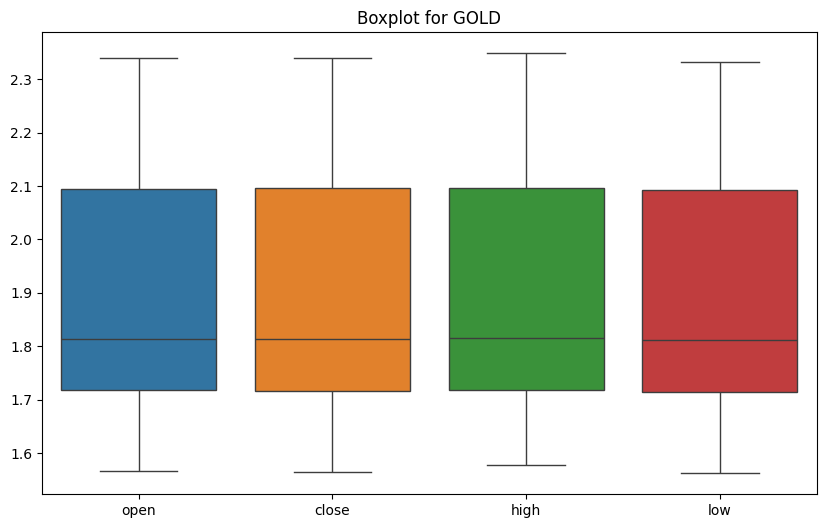

In [23]:
# Анализ выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['open', 'close', 'high', 'low']])
plt.title(f'Boxplot for {instrument}')
plt.show()

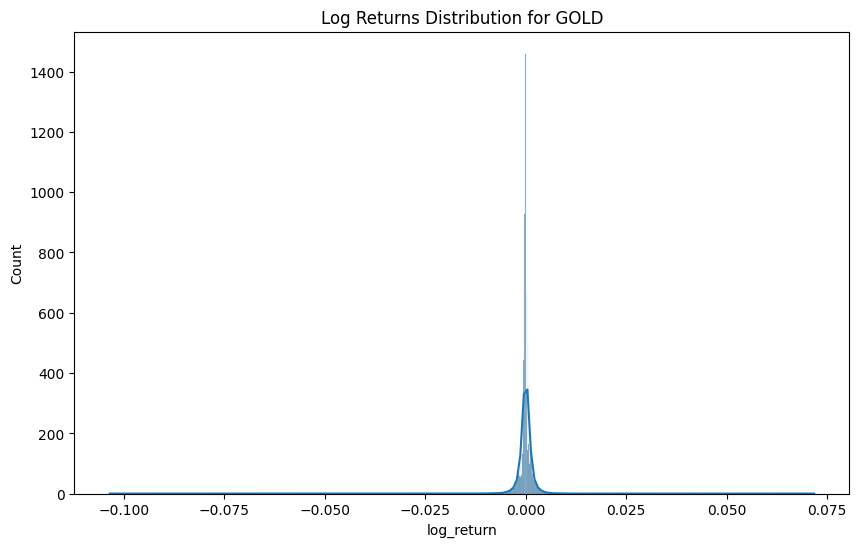

In [24]:
# Распределение логарифмических доходностей
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
plt.figure(figsize=(10, 6))
sns.histplot(df['log_return'].dropna(), kde=True)
plt.title(f'Log Returns Distribution for {instrument}')
plt.show()

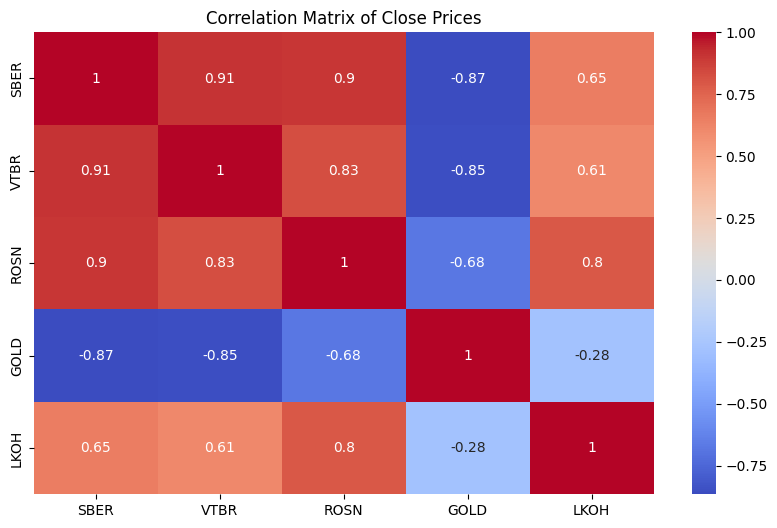

In [25]:
# Построение матрицы корреляций по столбцу close
close_prices = pd.DataFrame({key: df['close'] for key, df in data.items()})
corr_matrix = close_prices.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Close Prices')
plt.show()


Instrument: SBER
Shapiro-Wilk Test: Statistics=0.30402877810684104, p-value=1.5482616111574229e-102
Kolmogorov-Smirnov Test: Statistics=0.4943001139461896, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8860.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-94.0184067436269, p-value=0.0


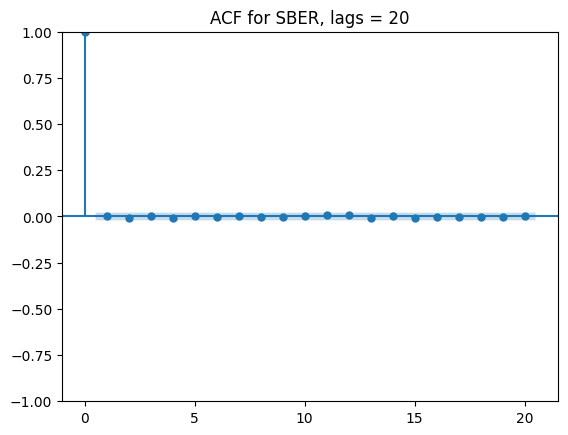

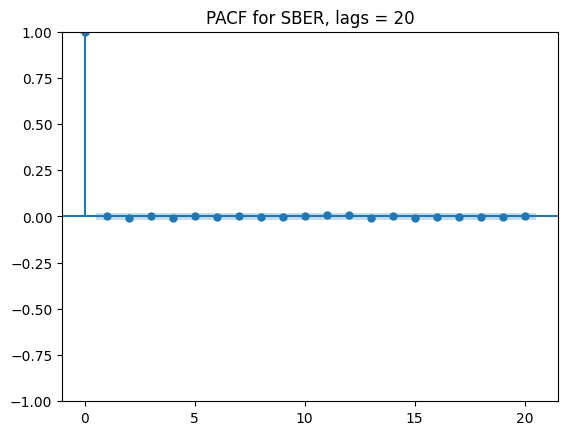

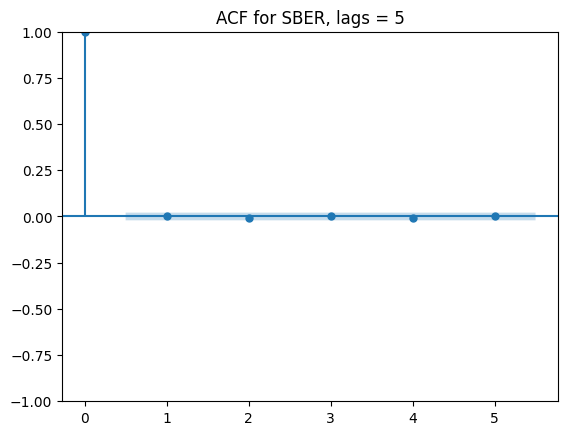

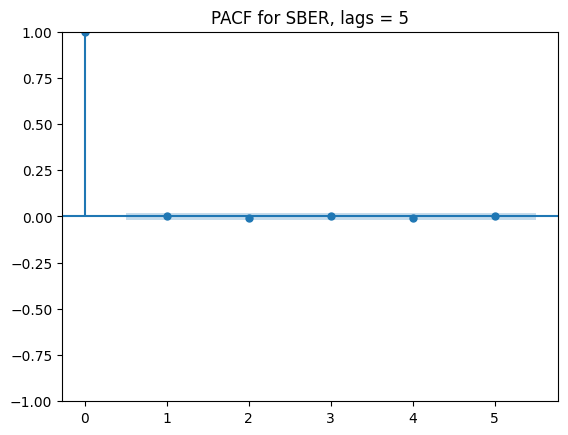


Instrument: VTBR
Shapiro-Wilk Test: Statistics=0.4063883118845565, p-value=7.459753228943181e-98
Kolmogorov-Smirnov Test: Statistics=0.4936967218040523, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8611.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-67.79371116284788, p-value=0.0


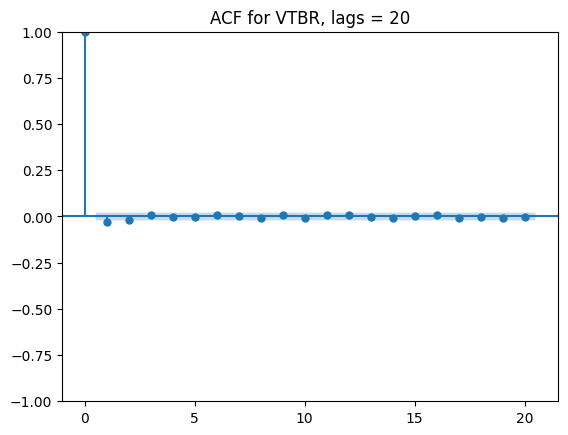

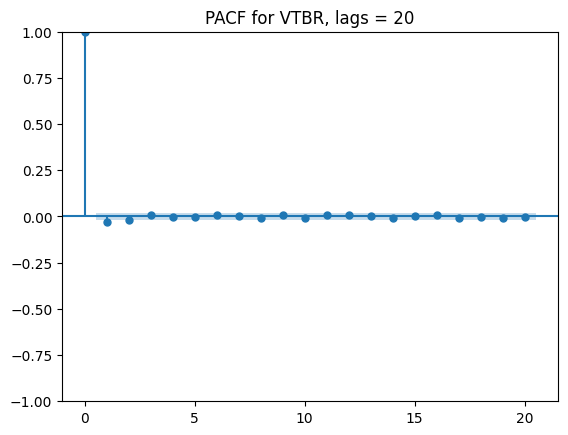

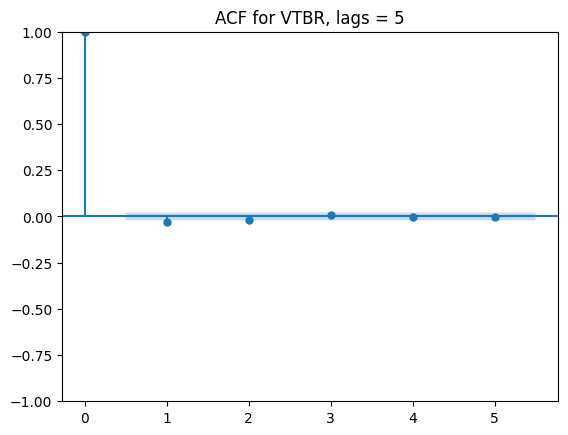

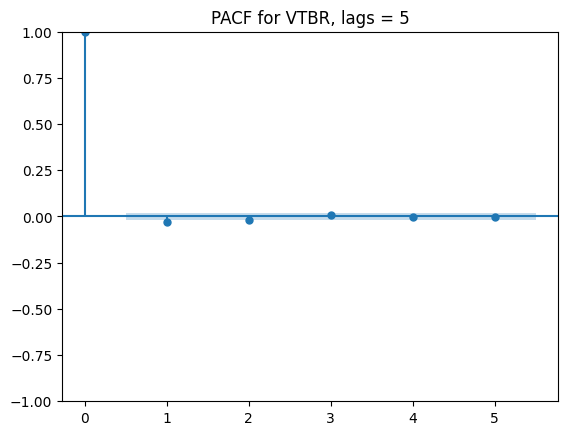


Instrument: ROSN
Shapiro-Wilk Test: Statistics=0.3837104957587698, p-value=1.5792558112422296e-99
Kolmogorov-Smirnov Test: Statistics=0.4942338259893239, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8860.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-47.6360121668006, p-value=0.0


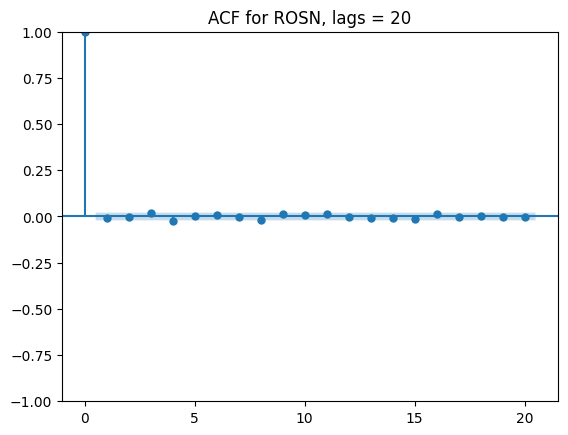

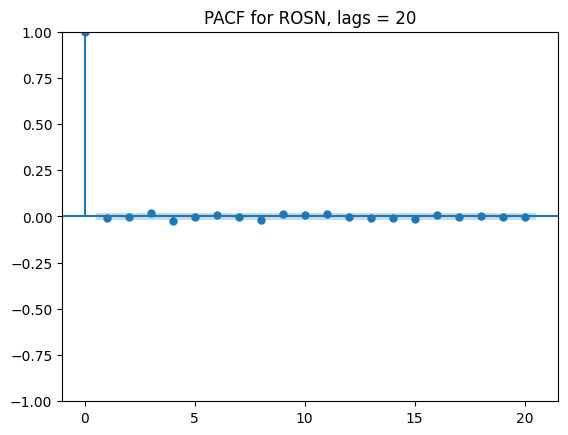

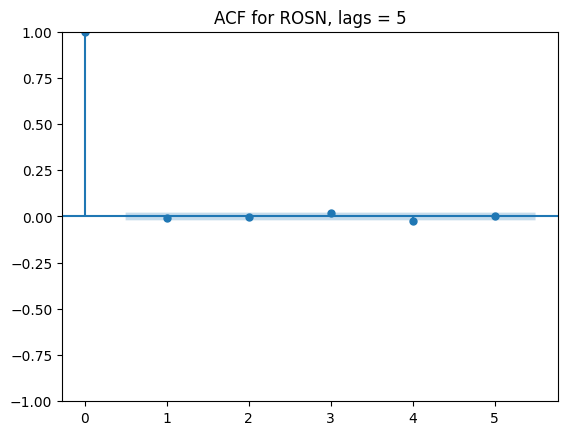

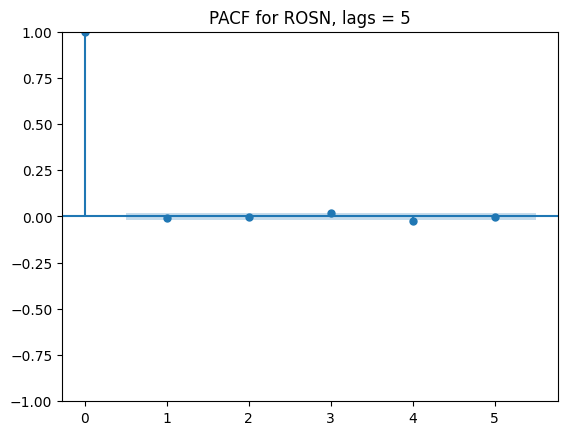


Instrument: GOLD
Shapiro-Wilk Test: Statistics=0.37978769593484973, p-value=1.1030166897177214e-99
Kolmogorov-Smirnov Test: Statistics=0.49436524225069434, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8860.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-97.99928872860482, p-value=0.0


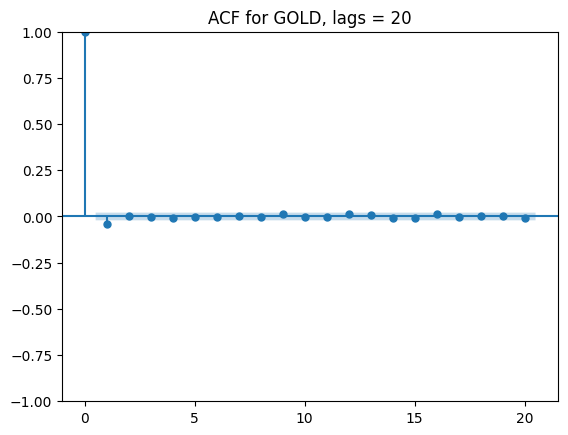

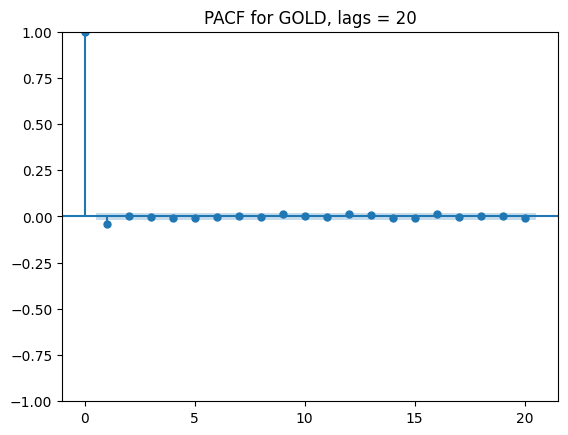

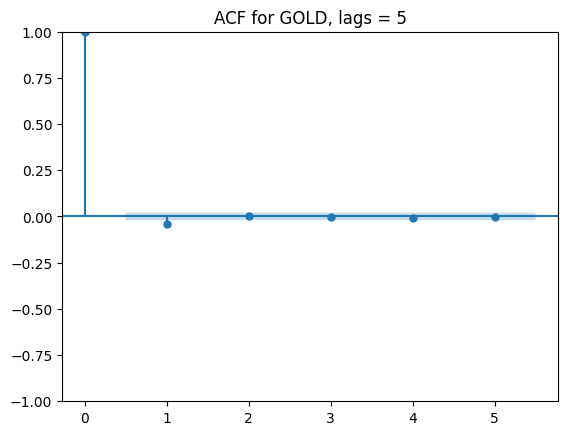

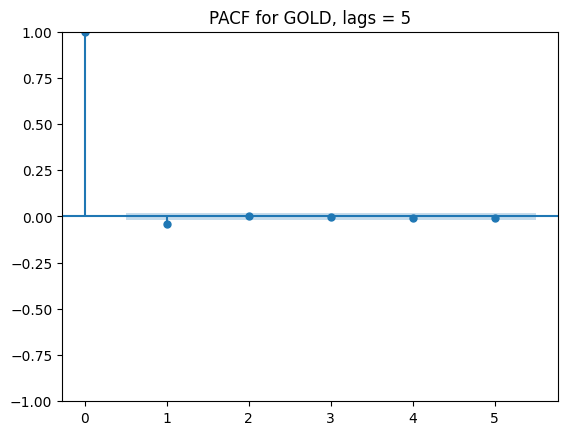


Instrument: LKOH
Shapiro-Wilk Test: Statistics=0.4963426972825513, p-value=1.2346225173276832e-94
Kolmogorov-Smirnov Test: Statistics=0.49484618502516486, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8860.
  res = hypotest_fun_out(*samples, **kwds)


ADF Test: Statistics=-48.14652589853786, p-value=0.0


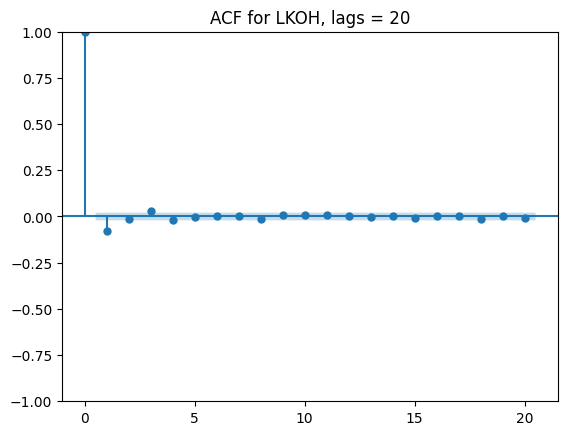

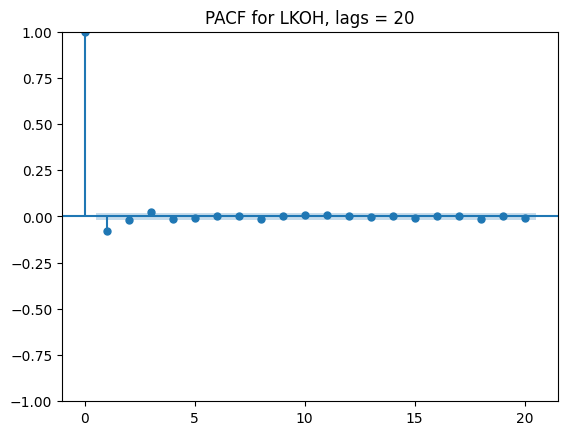

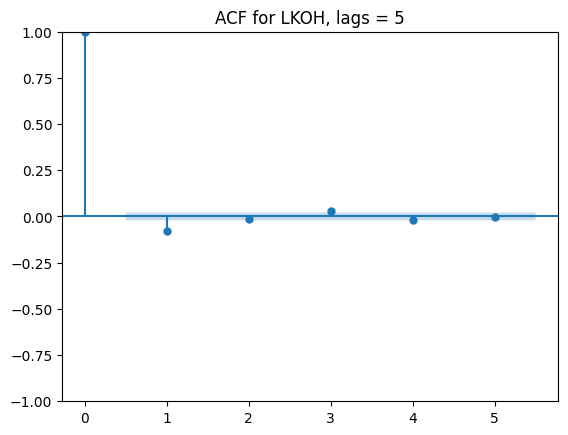

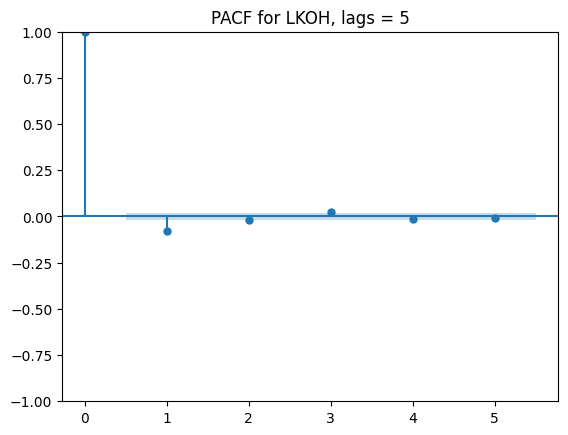

In [28]:
# Проверка гипотез
for key, df in data.items():
    print(f'\nInstrument: {key}')

    # Логарифмические доходности
    df['log_return'] = np.log(df['close'] / df['close'].shift(1)).dropna()

    # Проверка нормальности распределения логарифмических доходностей
    stat, p_value = shapiro(df['log_return'].dropna())
    print(f'Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}')

    stat, p_value = kstest(df['log_return'].dropna(), 'norm')
    print(f'Kolmogorov-Smirnov Test: Statistics={stat}, p-value={p_value}')

    # Проверка стационарности временных рядов
    result = adfuller(df['log_return'].dropna())
    print(f'ADF Test: Statistics={result[0]}, p-value={result[1]}')

    # ACF и PACF
    plot_acf(df['log_return'].dropna(), lags=20)
    plt.title(f'ACF for {key}, lags = 20')
    plt.show()

    plot_pacf(df['log_return'].dropna(), lags=20)
    plt.title(f'PACF for {key}, lags = 20')
    plt.show()

    plot_acf(df['log_return'].dropna(), lags=5)
    plt.title(f'ACF for {key}, lags = 5')
    plt.show()

    plot_pacf(df['log_return'].dropna(), lags=5)
    plt.title(f'PACF for {key}, lags = 5')
    plt.show()

In [12]:
# Разделение данных на трейн и тест
train, test = train_test_split(df, test_size=0.2, shuffle=False)
print(f'Train size: {len(train)}, Test size: {len(test)}')

Train size: 4034, Test size: 1009
